Normal version of skipgram

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Load data

In [74]:
corpus=["lion tiger carnivore", "tiger lion carnivore", "tiger carnivore lion ", "giraffe zebra herbivore", "zebra giraffe herbivore", "giraffe herbivore zebra", "honda toyota car", "toyota honda car"," honda car toyota","chicken beef meat","beef chicken meat","chicken meat beef", "potato cucumber vegetable","cucumber potato vegetable ", "potato vegetable cucumber", "bee ant insect","ant bee insect","bee insect ant","tennis cricket game","cricket tennis game","tennis game cricket","python java program","java python program","python program java","english hindi language","hindi english language","english language hindi","full time part time student","part time full time student","full time student part time","cocacola pepsi soda","pepsi cocacola soda","cocacola soda pepsi","asus macbook laptop","macbook asus laptop","asus laptop macbook","india brazil country","brazil india country","india country brazil","shirt pant dress","pant shirt dress","shirt dress pant","summer autumn season","autumn summer season","summer season autumn","solid liquid state","liquid solid state","solid state liquid","physics chemistry subject","chemistry physics subject","physiscs subject chemistry"]

In [75]:
corpus = [sent.split(" ") for sent in corpus]
corpus

[['lion', 'tiger', 'carnivore'],
 ['tiger', 'lion', 'carnivore'],
 ['tiger', 'carnivore', 'lion', ''],
 ['giraffe', 'zebra', 'herbivore'],
 ['zebra', 'giraffe', 'herbivore'],
 ['giraffe', 'herbivore', 'zebra'],
 ['honda', 'toyota', 'car'],
 ['toyota', 'honda', 'car'],
 ['', 'honda', 'car', 'toyota'],
 ['chicken', 'beef', 'meat'],
 ['beef', 'chicken', 'meat'],
 ['chicken', 'meat', 'beef'],
 ['potato', 'cucumber', 'vegetable'],
 ['cucumber', 'potato', 'vegetable', ''],
 ['potato', 'vegetable', 'cucumber'],
 ['bee', 'ant', 'insect'],
 ['ant', 'bee', 'insect'],
 ['bee', 'insect', 'ant'],
 ['tennis', 'cricket', 'game'],
 ['cricket', 'tennis', 'game'],
 ['tennis', 'game', 'cricket'],
 ['python', 'java', 'program'],
 ['java', 'python', 'program'],
 ['python', 'program', 'java'],
 ['english', 'hindi', 'language'],
 ['hindi', 'english', 'language'],
 ['english', 'language', 'hindi'],
 ['full', 'time', 'part', 'time', 'student'],
 ['part', 'time', 'full', 'time', 'student'],
 ['full', 'time', 's

In [76]:
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(corpus)))
vocab

['',
 'ant',
 'cucumber',
 'herbivore',
 'meat',
 'english',
 'vegetable',
 'physiscs',
 'tennis',
 'carnivore',
 'country',
 'solid',
 'hindi',
 'toyota',
 'bee',
 'summer',
 'soda',
 'insect',
 'autumn',
 'honda',
 'python',
 'student',
 'asus',
 'giraffe',
 'physics',
 'laptop',
 'season',
 'shirt',
 'dress',
 'pant',
 'java',
 'beef',
 'state',
 'language',
 'brazil',
 'lion',
 'full',
 'pepsi',
 'chicken',
 'time',
 'liquid',
 'subject',
 'part',
 'tiger',
 'macbook',
 'cocacola',
 'chemistry',
 'game',
 'car',
 'zebra',
 'cricket',
 'program',
 'india',
 'potato']

Numericalization

In [77]:
word2index = {w: i for i, w in enumerate(vocab)}
print(word2index)

{'': 0, 'ant': 1, 'cucumber': 2, 'herbivore': 3, 'meat': 4, 'english': 5, 'vegetable': 6, 'physiscs': 7, 'tennis': 8, 'carnivore': 9, 'country': 10, 'solid': 11, 'hindi': 12, 'toyota': 13, 'bee': 14, 'summer': 15, 'soda': 16, 'insect': 17, 'autumn': 18, 'honda': 19, 'python': 20, 'student': 21, 'asus': 22, 'giraffe': 23, 'physics': 24, 'laptop': 25, 'season': 26, 'shirt': 27, 'dress': 28, 'pant': 29, 'java': 30, 'beef': 31, 'state': 32, 'language': 33, 'brazil': 34, 'lion': 35, 'full': 36, 'pepsi': 37, 'chicken': 38, 'time': 39, 'liquid': 40, 'subject': 41, 'part': 42, 'tiger': 43, 'macbook': 44, 'cocacola': 45, 'chemistry': 46, 'game': 47, 'car': 48, 'zebra': 49, 'cricket': 50, 'program': 51, 'india': 52, 'potato': 53}


Lets check vocab size

In [78]:
voc_size = len(vocab)
print(voc_size)

54


In [79]:
vocab.append('<UNK>')
vocab

['',
 'ant',
 'cucumber',
 'herbivore',
 'meat',
 'english',
 'vegetable',
 'physiscs',
 'tennis',
 'carnivore',
 'country',
 'solid',
 'hindi',
 'toyota',
 'bee',
 'summer',
 'soda',
 'insect',
 'autumn',
 'honda',
 'python',
 'student',
 'asus',
 'giraffe',
 'physics',
 'laptop',
 'season',
 'shirt',
 'dress',
 'pant',
 'java',
 'beef',
 'state',
 'language',
 'brazil',
 'lion',
 'full',
 'pepsi',
 'chicken',
 'time',
 'liquid',
 'subject',
 'part',
 'tiger',
 'macbook',
 'cocacola',
 'chemistry',
 'game',
 'car',
 'zebra',
 'cricket',
 'program',
 'india',
 'potato',
 '<UNK>']

In [80]:
word2index['<UNK>'] = 0
index2word = {v:k for k, v in word2index.items()} 


Prepare training data

In [81]:
for c in corpus:
    print(c)

['lion', 'tiger', 'carnivore']
['tiger', 'lion', 'carnivore']
['tiger', 'carnivore', 'lion', '']
['giraffe', 'zebra', 'herbivore']
['zebra', 'giraffe', 'herbivore']
['giraffe', 'herbivore', 'zebra']
['honda', 'toyota', 'car']
['toyota', 'honda', 'car']
['', 'honda', 'car', 'toyota']
['chicken', 'beef', 'meat']
['beef', 'chicken', 'meat']
['chicken', 'meat', 'beef']
['potato', 'cucumber', 'vegetable']
['cucumber', 'potato', 'vegetable', '']
['potato', 'vegetable', 'cucumber']
['bee', 'ant', 'insect']
['ant', 'bee', 'insect']
['bee', 'insect', 'ant']
['tennis', 'cricket', 'game']
['cricket', 'tennis', 'game']
['tennis', 'game', 'cricket']
['python', 'java', 'program']
['java', 'python', 'program']
['python', 'program', 'java']
['english', 'hindi', 'language']
['hindi', 'english', 'language']
['english', 'language', 'hindi']
['full', 'time', 'part', 'time', 'student']
['part', 'time', 'full', 'time', 'student']
['full', 'time', 'student', 'part', 'time']
['cocacola', 'pepsi', 'soda']
['pe

Lets have a window size of 2

In [82]:
def random_batch(batch_size, word_sequence):
    
    # Make skip gram of one size window
    skip_grams = []
    # loop each word sequence
    # we starts from 1 because 0 has no context
    # we stop at second last for the same reason
    for sent in corpus:
        for i in range(1, len(sent) - 2):
            target = word2index[sent[i]]
            context = [word2index[sent[i - 2]], word2index[sent[i + 2]]]
            for w in context:
                skip_grams.append([target, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False) #randomly pick without replacement
        
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])  # target, e.g., 2
        random_labels.append([skip_grams[i][1]])  # context word, e.g., 3
            
    return np.array(random_inputs), np.array(random_labels)

Testing the method

In [83]:
batch_size = 2 # mini-batch size
input_batch, target_batch = random_batch(batch_size, corpus)

print("Input: ", input_batch)
print("Target: ", target_batch)


Input:  [[ 9]
 [39]]
Target:  [[ 0]
 [39]]


Model

In [84]:
class Skipgram(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Skipgram,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size)
        self.embedding_u = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, target_words, all_vocabs):
        center_embeds = self.embedding_v(center_words) 
        target_embeds = self.embedding_u(target_words) 
        all_embeds    = self.embedding_u(all_vocabs) 
        
        scores      = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax   
        return nll

Training

In [85]:
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
model          = Skipgram(voc_size, embedding_size)

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [86]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

#use for the normalized term in the probability calculation
all_vocabs = prepare_sequence(list(vocab), word2index).expand(batch_size, len(vocab))  # [batch_size, voc_size]
all_vocabs.shape

torch.Size([2, 55])

In [87]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [88]:
import time

# Training
num_epochs = 5000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, corpus)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1000 | cost: 3.865739 | time: 0m 0s
Epoch: 2000 | cost: 3.343431 | time: 0m 0s
Epoch: 3000 | cost: 1.969951 | time: 0m 0s
Epoch: 4000 | cost: 1.476329 | time: 0m 0s
Epoch: 5000 | cost: 1.756588 | time: 0m 0s


Plot embeddings

In [89]:
vocab[:10]
word = vocab[0]
id = word2index[word]
id

0

In [90]:
id_tensor = torch.LongTensor([id])
id_tensor

tensor([0])

In [91]:
v_embed = model.embedding_v(id_tensor)
u_embed = model.embedding_u(id_tensor)

v_embed, u_embed

(tensor([[1.1646, 0.0173]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.2259,  2.1730]], grad_fn=<EmbeddingBackward0>))

In [92]:
word_embed = (v_embed + u_embed) / 2
word_embed[0][1]

tensor(1.0952, grad_fn=<SelectBackward0>)

Get embedding of a given word

In [93]:
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

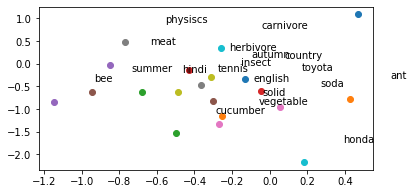

In [96]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(40, 20), textcoords='offset points')
plt.show()

Skipgram with random sampling

Negative Sampling

In [97]:
Z = 0.001


In [98]:
from collections import Counter

word_count = Counter(flatten(corpus))
num_total_words = sum([c for w, c in word_count.items()])

In [99]:
num_total_words


162

In [100]:
unigram_table = []

for vo in vocab:
    unigram_table.extend([vo] * int(((word_count[vo]/num_total_words)**0.75)/Z))

In [101]:
Counter(unigram_table)


Counter({'': 50,
         'ant': 50,
         'cucumber': 50,
         'herbivore': 50,
         'meat': 50,
         'english': 50,
         'vegetable': 50,
         'physiscs': 22,
         'tennis': 50,
         'carnivore': 50,
         'country': 50,
         'solid': 50,
         'hindi': 50,
         'toyota': 50,
         'bee': 50,
         'summer': 50,
         'soda': 50,
         'insect': 50,
         'autumn': 50,
         'honda': 50,
         'python': 50,
         'student': 50,
         'asus': 50,
         'giraffe': 50,
         'physics': 37,
         'laptop': 50,
         'season': 50,
         'shirt': 50,
         'dress': 50,
         'pant': 50,
         'java': 50,
         'beef': 50,
         'state': 50,
         'language': 50,
         'brazil': 50,
         'lion': 50,
         'full': 50,
         'pepsi': 50,
         'chicken': 50,
         'time': 84,
         'liquid': 50,
         'subject': 50,
         'part': 50,
         'tiger': 50,
      

In [102]:
import random

def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

In [103]:
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

In [104]:
target_batch.shape


torch.Size([2, 1])

In [105]:
class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, emb_size) # out embedding
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, center_words, target_words, negative_words):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        neg_embeds    = -self.embedding_u(negative_words) # [batch_size, num_neg, emb_size]
        
        positive_score = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        negative_score = neg_embeds.bmm(center_embeds.transpose(1, 2))
        #[batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, k, 1]
        
        loss = self.logsigmoid(positive_score) + torch.sum(self.logsigmoid(negative_score), 1)
                
        return -torch.mean(loss)
    
    def prediction(self, inputs):
        embeds = self.embedding_v(inputs)
        
        return embeds

In [106]:
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
model          = SkipgramNegSampling(voc_size, embedding_size)
num_neg        = 10 # num of negative sampling

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [107]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [108]:
import time

# Training
num_epochs = 5000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, corpus)
    
    #input_batch: [batch_size, 1]
    input_batch = torch.LongTensor(input_batch)
    
    #target_batch: [batch_size, 1]
    target_batch = torch.LongTensor(target_batch)
    
    #negs_batch:   [batch_size, num_neg]
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()
        
    loss = model(input_batch, target_batch, negs_batch)
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

Epoch: 1000 | cost: 9.767031 | time: 0m 0s
Epoch: 2000 | cost: 8.161299 | time: 0m 0s
Epoch: 3000 | cost: 6.261340 | time: 0m 0s
Epoch: 4000 | cost: 3.926090 | time: 0m 0s
Epoch: 5000 | cost: 2.393404 | time: 0m 0s


Get embedding by averaging

In [109]:
 v_embed = model.embedding_v(id_tensor)
u_embed = model.embedding_u(id_tensor)

v_embed, u_embed


    
    
    

(tensor([[-0.7484, -0.4158]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.0351,  0.0781]], grad_fn=<EmbeddingBackward0>))

In [110]:
word_embed = (v_embed + u_embed) / 2
word_embed[0][1]

tensor(-0.1689, grad_fn=<SelectBackward0>)

In [111]:
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

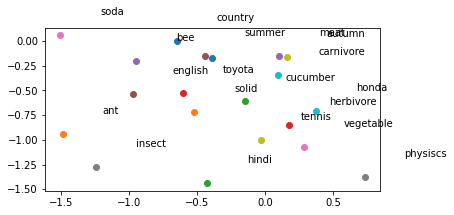

In [112]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(40, 20), textcoords='offset points')
plt.show()

CBOW

In [1]:
corpus=["lion tiger carnivore", "tiger lion carnivore", "tiger carnivore lion ", "giraffe zebra herbivore", "zebra giraffe herbivore", "giraffe herbivore zebra", "honda toyota car", "toyota honda car"," honda car toyota","chicken beef meat","beef chicken meat","chicken meat beef", "potato cucumber vegetable","cucumber potato vegetable ", "potato vegetable cucumber", "bee ant insect","ant bee insect","bee insect ant","tennis cricket game","cricket tennis game","tennis game cricket","python java program","java python program","python program java","english hindi language","hindi english language","english language hindi","full time part time student","part time full time student","full time student part time","cocacola pepsi soda","pepsi cocacola soda","cocacola soda pepsi","asus macbook laptop","macbook asus laptop","asus laptop macbook","india brazil country","brazil india country","india country brazil","shirt pant dress","pant shirt dress","shirt dress pant","summer autumn season","autumn summer season","summer season autumn","solid liquid state","liquid solid state","solid state liquid","physics chemistry subject","chemistry physics subject","physiscs subject chemistry"]

Preparing data for training

In [2]:
corpus = [sent.split(" ") for sent in corpus]
corpus

[['lion', 'tiger', 'carnivore'],
 ['tiger', 'lion', 'carnivore'],
 ['tiger', 'carnivore', 'lion', ''],
 ['giraffe', 'zebra', 'herbivore'],
 ['zebra', 'giraffe', 'herbivore'],
 ['giraffe', 'herbivore', 'zebra'],
 ['honda', 'toyota', 'car'],
 ['toyota', 'honda', 'car'],
 ['', 'honda', 'car', 'toyota'],
 ['chicken', 'beef', 'meat'],
 ['beef', 'chicken', 'meat'],
 ['chicken', 'meat', 'beef'],
 ['potato', 'cucumber', 'vegetable'],
 ['cucumber', 'potato', 'vegetable', ''],
 ['potato', 'vegetable', 'cucumber'],
 ['bee', 'ant', 'insect'],
 ['ant', 'bee', 'insect'],
 ['bee', 'insect', 'ant'],
 ['tennis', 'cricket', 'game'],
 ['cricket', 'tennis', 'game'],
 ['tennis', 'game', 'cricket'],
 ['python', 'java', 'program'],
 ['java', 'python', 'program'],
 ['python', 'program', 'java'],
 ['english', 'hindi', 'language'],
 ['hindi', 'english', 'language'],
 ['english', 'language', 'hindi'],
 ['full', 'time', 'part', 'time', 'student'],
 ['part', 'time', 'full', 'time', 'student'],
 ['full', 'time', 's

In [3]:
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(corpus)))
vocab

['',
 'season',
 'carnivore',
 'time',
 'potato',
 'giraffe',
 'country',
 'dress',
 'physiscs',
 'python',
 'autumn',
 'toyota',
 'macbook',
 'chemistry',
 'pepsi',
 'cucumber',
 'vegetable',
 'full',
 'beef',
 'tennis',
 'pant',
 'india',
 'summer',
 'solid',
 'honda',
 'cocacola',
 'meat',
 'chicken',
 'liquid',
 'physics',
 'brazil',
 'zebra',
 'state',
 'shirt',
 'lion',
 'asus',
 'tiger',
 'student',
 'laptop',
 'insect',
 'car',
 'soda',
 'bee',
 'hindi',
 'language',
 'cricket',
 'game',
 'java',
 'part',
 'subject',
 'herbivore',
 'program',
 'ant',
 'english']

In [4]:
for c in corpus:
    print(c)

['lion', 'tiger', 'carnivore']
['tiger', 'lion', 'carnivore']
['tiger', 'carnivore', 'lion', '']
['giraffe', 'zebra', 'herbivore']
['zebra', 'giraffe', 'herbivore']
['giraffe', 'herbivore', 'zebra']
['honda', 'toyota', 'car']
['toyota', 'honda', 'car']
['', 'honda', 'car', 'toyota']
['chicken', 'beef', 'meat']
['beef', 'chicken', 'meat']
['chicken', 'meat', 'beef']
['potato', 'cucumber', 'vegetable']
['cucumber', 'potato', 'vegetable', '']
['potato', 'vegetable', 'cucumber']
['bee', 'ant', 'insect']
['ant', 'bee', 'insect']
['bee', 'insect', 'ant']
['tennis', 'cricket', 'game']
['cricket', 'tennis', 'game']
['tennis', 'game', 'cricket']
['python', 'java', 'program']
['java', 'python', 'program']
['python', 'program', 'java']
['english', 'hindi', 'language']
['hindi', 'english', 'language']
['english', 'language', 'hindi']
['full', 'time', 'part', 'time', 'student']
['part', 'time', 'full', 'time', 'student']
['full', 'time', 'student', 'part', 'time']
['cocacola', 'pepsi', 'soda']
['pe

Lets have a window size of 2

In [5]:
def random_batch(batch_size, word_sequence):
    
    # Make skip gram of one size window
    skip_grams_cbow = []
    # loop each word sequence
    # we starts from 1 because 0 has no context
    # we stop at second last for the same reason
    for sent in corpus:
        for i in range(2, len(sent) - 2):
            target = word2index[sent[i]]
            context = [word2index[sent[i - 2]], word2index[sent[i + 2]]]
            for w in context:
                skip_grams_cbow.append([target, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams_cbow)), batch_size, replace=False) #randomly pick without replacement
        
    for i in random_index:
        random_inputs.append([skip_grams_cbow[i][0]])  # target, e.g., 2
        random_labels.append([skip_grams_cbow[i][1]])  # context word, e.g., 3
            
    return np.array(random_inputs), np.array(random_labels)

Model

In [8]:
class Skipgram(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Skipgram,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size)
        self.embedding_u = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, target_words, all_vocabs):
        center_embeds = self.embedding_v(center_words) 
        target_embeds = self.embedding_u(target_words) 
        all_embeds    = self.embedding_u(all_vocabs) 
        
        scores      = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax   
        return nll


NameError: ignored